Plotting the sFits here, to keep a common style. Quick and dirty for now!

In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib_hep import histpoints, make_split

import ROOT

import root_numpy
from root_pandas import read_root, to_root
from uncertainties import ufloat

In [9]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'

# plot some logistic function

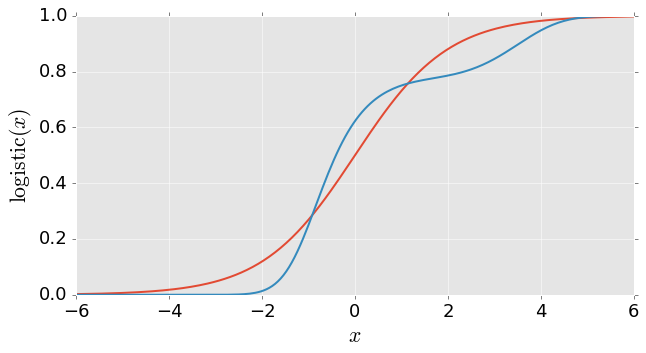

In [3]:
plt.figure(figsize=(10, 5))
xs = np.linspace(-6, 6, 200)
plt.plot(xs, stats.logistic.cdf(xs), lw=2)
plt.plot(xs, stats.logistic.cdf(0.5 + xs - 0.5 * xs**2 + 0.1 * xs**3), lw=2)
plt.xlabel('$x$')
plt.ylabel(r'$\mathrm{logistic}(x)$')
plt.savefig('build/logistic-example.pdf', bbox_inches='tight')
plt.show()

# and plot the mass fits

In [4]:
cs = [c['color'] for c in plt.rcParams['axes.prop_cycle']]

In [5]:
def plotting_function(x, mean, exp, sigma1, sigma2, sigma3, nsig, nbkg, c1, c2, range=(5230, 5330)):
    normvals = stats.expon.cdf(list(range), range[0], -1 / exp)
    exp_norm = normvals[1] - normvals[0]
    return (
        c1 * nsig * stats.norm.pdf(x, gauss_mean, sigma1)
        + (1 - c1) * c2 * nsig * stats.norm.pdf(x, gauss_mean, sigma2)
        + (1 - c1) * (1 - c2) * nsig * stats.norm.pdf(x, gauss_mean, sigma2)
        + nbkg / exp_norm * stats.expon.pdf(x, range[0], -1 / exp)
    )

In [6]:
fit_filenames = {
    '/home/kheinicke/tank/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2011_MD_selected_kheinick.root': """\
        BkgYield	  = 28402	 +/-  523.819	(limited)
        SigYield	  = 184800	 +/-  656.628	(limited)
        frac	  = 0.667191	 +/-  0.0219447	(limited)
        pdfBkgMass_exp	  = -0.00157317	 +/-  0.000245714	(limited)
        pdfSigMass_gauss_mean	  = 5280.8	 +/-  0.0264162	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.08775	 +/-  0.0934879	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.6035	 +/-  0.387397	(limited)""",
    '/home/kheinicke/tank/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2011_MU_selected_kheinick.root': """\
        BkgYield	  = 21232.6	 +/-  446.139	(limited)
        SigYield	  = 133948	 +/-  558.602	(limited)
        frac	  = 0.667869	 +/-  0.0277922	(limited)
        pdfBkgMass_exp	  = -0.00156242	 +/-  0.000282738	(limited)
        pdfSigMass_gauss_mean	  = 5281.01	 +/-  0.0309546	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.09608	 +/-  0.114634	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.426	 +/-  0.470031	(limited)""",
    '/home/kheinicke/tank/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2012_MD_selected_kheinick.root': """\
        BkgYield	  = 65398	 +/-  775.27	(limited)
        SigYield	  = 361580	 +/-  947.697	(limited)
        frac	  = 0.667593	 +/-  0.0182651	(limited)
        pdfBkgMass_exp	  = -0.0012771	 +/-  0.000158619	(limited)
        pdfSigMass_gauss_mean	  = 5280.84	 +/-  0.0190277	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.11528	 +/-  0.0740781	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.3743	 +/-  0.304562	(limited)""",
    '/home/kheinicke/tank/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2012_MU_selected_kheinick.root': """\
        BkgYield	  = 64366.3	 +/-  765.297	(limited)
        SigYield	  = 362198	 +/-  940.39	(limited)
        frac	  = 0.652609	 +/-  0.0164178	(limited)
        pdfBkgMass_exp	  = -0.000964515	 +/-  0.000160738	(limited)
        pdfSigMass_gauss_mean	  = 5281.05	 +/-  0.0190901	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.03584	 +/-  0.0697398	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.4601	 +/-  0.274451	(limited)""",
    '/home/kheinicke/tank/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2016_MU_selected_kheinick.root': """\
        BkgYield	  = 17101.1	 +/-  393.652	(limited)
        SigYield	  = 88322.2	 +/-  475.813	(limited)
        frac	  = 0.685712	 +/-  0.0380072	(limited)
        pdfBkgMass_exp	  = -0.00128957	 +/-  0.000306067	(limited)
        pdfSigMass_gauss_mean	  = 5279.62	 +/-  0.0389475	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.27933	 +/-  0.149243	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.5018	 +/-  0.664492	(limited)""",
    '/home/kheinicke/tank/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2016_MD_selected_kheinick.root': """\
        BkgYield	  = 16788	 +/-  390.838	(limited)
        SigYield	  = 85872	 +/-  471.232	(limited)
        frac	  = 0.700103	 +/-  0.0394575	(limited)
        pdfBkgMass_exp	  = -0.000950833	 +/-  0.000308064	(limited)
        pdfSigMass_gauss_mean	  = 5279.46	 +/-  0.0396381	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.39386	 +/-  0.151129	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.5591	 +/-  0.712257	(limited)""",
    '/home/kheinicke/tank/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2015_MD_selected_kheinick.root': """\
        BkgYield	  = 5249.34	 +/-  233.222	(limited)
        SigYield	  = 24827.9	 +/-  271.882	(limited)
        frac	  = 0.629112	 +/-  0.0475321	(limited)
        pdfBkgMass_exp	  = -0.00150087	 +/-  0.000563167	(limited)
        pdfSigMass_gauss_mean	  = 5279.61	 +/-  0.0764057	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.03656	 +/-  0.226015	(limited)
        pdfSigMass_gauss_sigma_2	  = 15.0518	 +/-  0.920172	(limited)""",
    '/home/kheinicke/tank/flavourtagging/Bu2JpsiK_MuonTrainingTuple_2015_MU_selected_kheinick.root': """\
        BkgYield	  = 11758.1	 +/-  291.326	(limited)
        SigYield	  = 51242.7	 +/-  352.787	(limited)
        frac	  = 0.597379	 +/-  0.0650558	(limited)
        pdfBkgMass_exp	  = -0.000993168	 +/-  0.000362921	(limited)
        pdfSigMass_gauss_mean	  = 5279.67	 +/-  0.0518891	(limited)
        pdfSigMass_gauss_sigma_1	  = 7.9532	 +/-  0.258725	(limited)
        pdfSigMass_gauss_sigma_2	  = 13.5159	 +/-  0.739288	(limited)""",
}

        BkgYield	  = 11758.1	 +/-  291.326	(limited)
        SigYield	  = 51242.7	 +/-  352.787	(limited)
        frac	  = 0.597379	 +/-  0.0650558	(limited)
        pdfBkgMass_exp	  = -0.000993168	 +/-  0.000362921	(limited)
        pdfSigMass_gauss_mean	  = 5279.67	 +/-  0.0518891	(limited)
        pdfSigMass_gauss_sigma_1	  = 7.9532	 +/-  0.258725	(limited)
        pdfSigMass_gauss_sigma_2	  = 13.5159	 +/-  0.739288	(limited)


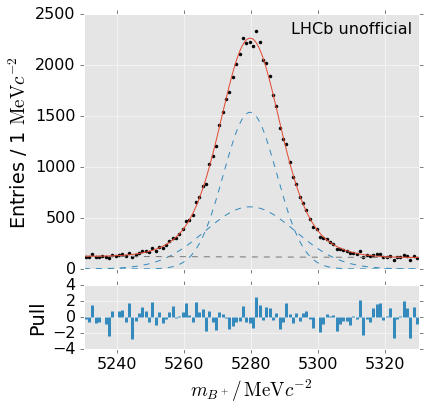

        BkgYield	  = 5249.34	 +/-  233.222	(limited)
        SigYield	  = 24827.9	 +/-  271.882	(limited)
        frac	  = 0.629112	 +/-  0.0475321	(limited)
        pdfBkgMass_exp	  = -0.00150087	 +/-  0.000563167	(limited)
        pdfSigMass_gauss_mean	  = 5279.61	 +/-  0.0764057	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.03656	 +/-  0.226015	(limited)
        pdfSigMass_gauss_sigma_2	  = 15.0518	 +/-  0.920172	(limited)


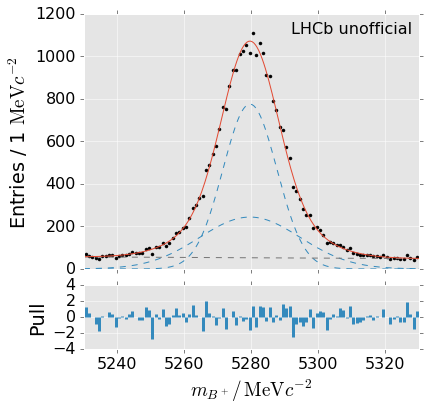

        BkgYield	  = 16788	 +/-  390.838	(limited)
        SigYield	  = 85872	 +/-  471.232	(limited)
        frac	  = 0.700103	 +/-  0.0394575	(limited)
        pdfBkgMass_exp	  = -0.000950833	 +/-  0.000308064	(limited)
        pdfSigMass_gauss_mean	  = 5279.46	 +/-  0.0396381	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.39386	 +/-  0.151129	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.5591	 +/-  0.712257	(limited)


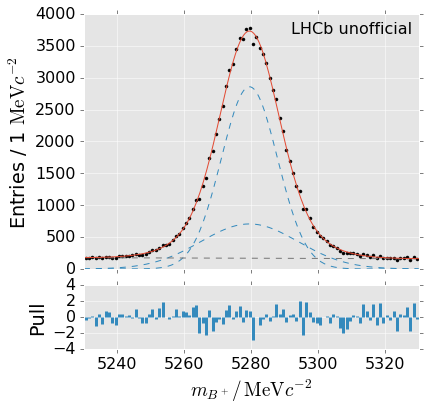

        BkgYield	  = 65398	 +/-  775.27	(limited)
        SigYield	  = 361580	 +/-  947.697	(limited)
        frac	  = 0.667593	 +/-  0.0182651	(limited)
        pdfBkgMass_exp	  = -0.0012771	 +/-  0.000158619	(limited)
        pdfSigMass_gauss_mean	  = 5280.84	 +/-  0.0190277	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.11528	 +/-  0.0740781	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.3743	 +/-  0.304562	(limited)


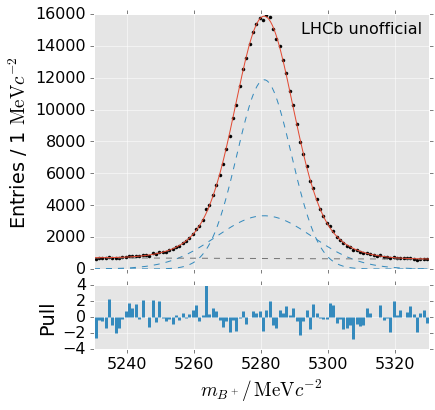

        BkgYield	  = 28402	 +/-  523.819	(limited)
        SigYield	  = 184800	 +/-  656.628	(limited)
        frac	  = 0.667191	 +/-  0.0219447	(limited)
        pdfBkgMass_exp	  = -0.00157317	 +/-  0.000245714	(limited)
        pdfSigMass_gauss_mean	  = 5280.8	 +/-  0.0264162	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.08775	 +/-  0.0934879	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.6035	 +/-  0.387397	(limited)


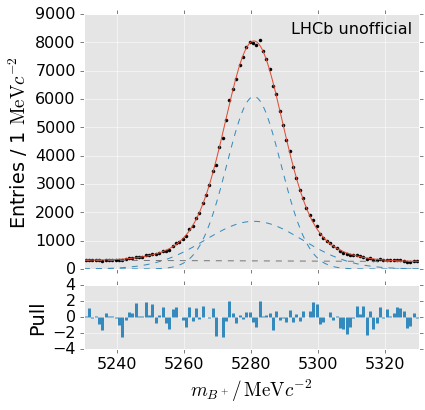

        BkgYield	  = 17101.1	 +/-  393.652	(limited)
        SigYield	  = 88322.2	 +/-  475.813	(limited)
        frac	  = 0.685712	 +/-  0.0380072	(limited)
        pdfBkgMass_exp	  = -0.00128957	 +/-  0.000306067	(limited)
        pdfSigMass_gauss_mean	  = 5279.62	 +/-  0.0389475	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.27933	 +/-  0.149243	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.5018	 +/-  0.664492	(limited)


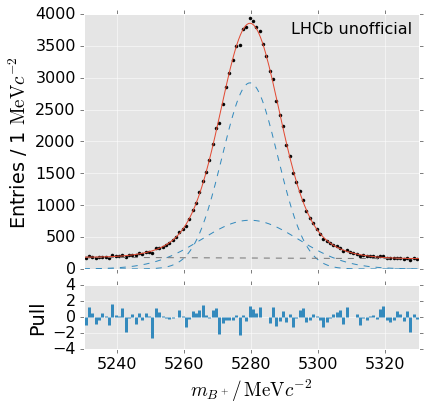

        BkgYield	  = 64366.3	 +/-  765.297	(limited)
        SigYield	  = 362198	 +/-  940.39	(limited)
        frac	  = 0.652609	 +/-  0.0164178	(limited)
        pdfBkgMass_exp	  = -0.000964515	 +/-  0.000160738	(limited)
        pdfSigMass_gauss_mean	  = 5281.05	 +/-  0.0190901	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.03584	 +/-  0.0697398	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.4601	 +/-  0.274451	(limited)


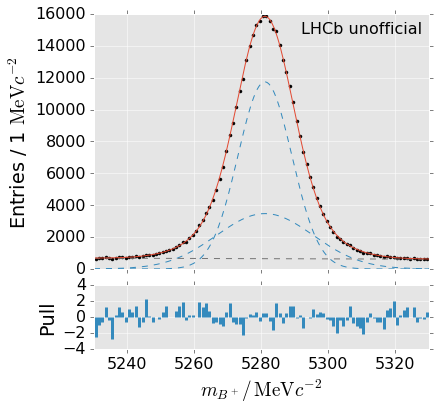

        BkgYield	  = 21232.6	 +/-  446.139	(limited)
        SigYield	  = 133948	 +/-  558.602	(limited)
        frac	  = 0.667869	 +/-  0.0277922	(limited)
        pdfBkgMass_exp	  = -0.00156242	 +/-  0.000282738	(limited)
        pdfSigMass_gauss_mean	  = 5281.01	 +/-  0.0309546	(limited)
        pdfSigMass_gauss_sigma_1	  = 8.09608	 +/-  0.114634	(limited)
        pdfSigMass_gauss_sigma_2	  = 14.426	 +/-  0.470031	(limited)


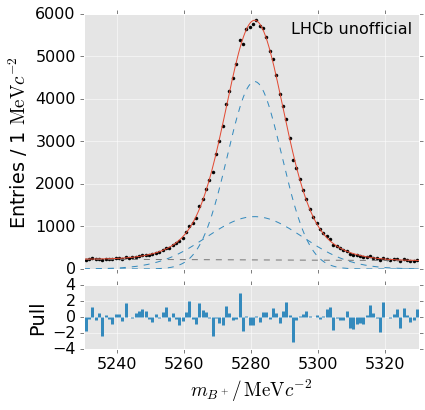

In [20]:
for filename, fit_params in fit_filenames.items():
    df = read_root(filename, key='DecayTree', columns=['B_LOKI_MASS_JpsiConstr_NoPVConstr'])

    year, magnet = map(filename.split('_').__getitem__, [2, 3])
    
    parsed_params = {}
    print(fit_params)
    for p in fit_params.split('\n'):
        left, right = p.split('=')
        variable = left.strip()
        value, right = right.split('+/-')
        value = float(value.strip())
        error = float(right.replace('(limited)', '').strip())
        parsed_params[variable] = value

    # build the model
    gauss_mean = parsed_params['pdfSigMass_gauss_mean']
    gauss_sigma1 = parsed_params['pdfSigMass_gauss_sigma_1']
    gauss_sigma2 = parsed_params['pdfSigMass_gauss_sigma_2']
    gauss_sigma3 = parsed_params['pdfSigMass_gauss_sigma_3'] if 'pdfSigMass_gauss_sigma_3' in parsed_params else 0
    exponent = parsed_params['pdfBkgMass_exp']
    nbkg = parsed_params['BkgYield']
    nsig = parsed_params['SigYield']
    fracg1 = parsed_params['frac']
    fracg2 = parsed_params['frac_rec'] if 'frac_rec' in parsed_params else 1

    # some normalization stuff
    exp_norm = stats.expon.cdf([5230, 5330], 5230, -1 / exponent)
    exp_norm = exp_norm[1] - exp_norm[0]

    # plot!
    plt.figure(figsize=(6, 6))
    ax_top, ax_bottom = make_split(0.8, 0.1)
    plt.sca(ax_top)
    hist, edges = np.histogram(df.B_LOKI_MASS_JpsiConstr_NoPVConstr, range=(5230, 5330), bins=100)
    width = (edges[1] - edges[0])
    bin_content = np.sum(hist * width)
    scale = bin_content / (nsig + nbkg)
    x = edges[:-1] + (edges[1:] - edges[:-1]) / 2
    y = hist
    plt.plot(x, y, 'k.')
    xs = np.linspace(5230, 5330, 200)
    g1, g2, g3, exp = (
        scale * fracg1 * nsig * stats.norm.pdf(xs, gauss_mean, gauss_sigma1),
        scale * (1 - fracg1) * fracg2 * nsig * stats.norm.pdf(xs, gauss_mean, gauss_sigma2),
        scale * (1 - fracg1) * (1 - fracg2) * nsig * stats.norm.pdf(xs, gauss_mean, gauss_sigma3),
        scale * nbkg / exp_norm * stats.expon.pdf(xs, 5230, -1 / exponent)
    )

    fun = lambda a: plotting_function(a, gauss_mean, exponent, gauss_sigma1, gauss_sigma2, gauss_sigma3,
                                      nsig, nbkg, fracg1, fracg2)

    plt.plot(xs, g1, '--', color=cs[1])
    plt.plot(xs, g2, '--', color=cs[1])
    plt.plot(xs, g3, '--', color=cs[1])
    plt.plot(xs, exp, '--', color=cs[3])
    plt.plot(xs, scale * fun(xs))
    plt.ylabel(r'Entries / {:.0f} $\mathrm{{MeV}}{{c^{{-2}}}}$'.format(width))
    plt.xlim(5230, 5330)
    plt.text(0.98, 0.97, 'LHCb unofficial', ha='right', va='top', transform=plt.gca().transAxes)

    plt.sca(ax_bottom)
    res = y - scale * fun(x)
    errs = np.sqrt(y)
    pulls = res / errs
    plt.vlines(x, 0, pulls, lw=3, color=cs[1])
    plt.ylabel('Pull')
    plt.xlabel(r'$m_{B^+} /\,\mathrm{MeV}{c^{-2}}$')
    plt.ylim(-4, 4)
    plt.locator_params(axis='y', nbins=4)

    plt.savefig('build/massfit-{}-{}.pdf'.format(year, magnet), bbox_inches='tight')
    plt.show()